### Data Prepare (Metric, Config)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

A_metrics = pd.read_csv("/home/sein/mk_config/ycsb_AA/results/external_metrics.csv")

In [2]:
A_metrics = pd.read_csv("/home/sein/mk_config/ycsb_AA/results/external_metrics.csv")

metrics = A_metrics.drop(['Unnamed: 0'], axis = 1)


In [3]:
# metrics = metrics.replace([np.inf],9999999)
metrics = metrics.replace([np.inf],9999999)


metrics


,tps,latency
0,0.216666,20847397
1,0.322221,12744942
2,3789.313102,1076
3,0.166667,12510551
4,0.266666,10686198
...,...,...
995,0.138889,11836756
996,0.149999,16386967
997,0.227778,19293708
998,0.188888,10529195


### Data Prepare (Config)

In [4]:
import random
import glob
import os
import sys
import pandas as pd

knob_list = glob.glob("/home/sein/mk_config/ycsb_AA/configs/my_*.cnf")


In [5]:
cnt = 0

for xx in range(len(knob_list)):
    path = "/home/sein/mk_config/ycsb_AA/configs/my_{}.cnf".format(xx)
    # knob_list = glob.glob("/home/sein/2023_EDBT/KCC_tpcc_dataset/my_*.cnf")
    a_all = pd.read_csv(path, sep="=", names=['Sample', 'value'], header=2)
    a_all = a_all.set_index("Sample")
    cur_all_df = a_all.T
    
    if cnt == 0:
        A_config = cur_all_df
    else :
        A_config = pd.concat([A_config, cur_all_df], axis=0)
    cnt += 1
A_config = A_config.reset_index()
A_config = A_config.drop(["index"],axis=1)
A_config = A_config.drop(A_config.columns[[0,1]], axis=1)


A_config

Sample,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,stored_program_cache,sync_binlog,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,489472,200000,13200,4000,18,11520,255852544,28672,94208,0
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,374528,50000,91600,4000,17,15360,402653184,110592,71680,1
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,37120,660000,15600,1,9,1024,851443712,8192,122880,0
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,427776,430000,11200,10000,9,13568,163577856,16384,83968,0
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,388096,880000,11600,4000,25,1536,348127232,126976,57344,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,18000,4276224,945000,610000,1,4096000,432013312,0,29,...,159744,520000,91200,8000,63,7680,163577856,57344,104448,1
996,1,57000,5636096,245000,211000,1,8716288,268435456,1,24,...,455936,940000,89600,2000,29,11520,230686720,69632,61440,0
997,1,2000,622592,45000,537000,1,393216,671088640,7,20,...,308480,810000,66000,8000,48,12544,536870912,81920,108544,1
998,0,38000,5505024,700000,598000,0,9125888,834666496,3,17,...,404992,260000,70400,2000,57,3840,218103808,36864,63488,1


- all_samples = config + metrics

In [6]:
all_samples = pd.concat([A_config,metrics], axis=1)

all_samples

,automatic_sp_privileges,back_log,binlog_cache_size,binlog_group_commit_sync_delay,binlog_group_commit_sync_no_delay_count,binlog_rows_query_log_events,binlog_stmt_cache_size,bulk_insert_buffer_size,default_week_format,div_precision_increment,...,table_definition_cache,table_open_cache,table_open_cache_instances,thread_cache_size,tmp_table_size,transaction_alloc_block_size,transaction_prealloc_size,updatable_views_with_limit,tps,latency
0,1,24000,7700480,485000,352000,0,655360,356515840,7,1,...,13200,4000,18,11520,255852544,28672,94208,0,0.216666,20847397
1,0,15000,622592,140000,701000,1,2637824,595591168,5,8,...,91600,4000,17,15360,402653184,110592,71680,1,0.322221,12744942
2,1,8000,7110656,440000,801000,1,8093696,570425344,4,4,...,15600,1,9,1024,851443712,8192,122880,0,3789.313102,1076
3,0,34000,8519680,760000,303000,0,10420224,343932928,3,4,...,11200,10000,9,13568,163577856,16384,83968,0,0.166667,12510551
4,0,12000,6291456,380000,630000,1,5472256,243269632,1,13,...,11600,4000,25,1536,348127232,126976,57344,0,0.266666,10686198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,18000,4276224,945000,610000,1,4096000,432013312,0,29,...,91200,8000,63,7680,163577856,57344,104448,1,0.138889,11836756
996,1,57000,5636096,245000,211000,1,8716288,268435456,1,24,...,89600,2000,29,11520,230686720,69632,61440,0,0.149999,16386967
997,1,2000,622592,45000,537000,1,393216,671088640,7,20,...,66000,8000,48,12544,536870912,81920,108544,1,0.227778,19293708
998,0,38000,5505024,700000,598000,0,9125888,834666496,3,17,...,70400,2000,57,3840,218103808,36864,63488,1,0.188888,10529195


In [7]:
### boolean에 해당하는 열 정리

discrete_columns = [all_samples.columns[0], all_samples.columns[5],all_samples.columns[10],all_samples.columns[13],
                    all_samples.columns[17],all_samples.columns[24],all_samples.columns[30],all_samples.columns[31],
                    all_samples.columns[32],all_samples.columns[34],all_samples.columns[36],all_samples.columns[37],
                    all_samples.columns[58],all_samples.columns[60],all_samples.columns[64],all_samples.columns[68],
                    all_samples.columns[72],all_samples.columns[73],all_samples.columns[74],all_samples.columns[75],
                    all_samples.columns[77],all_samples.columns[80],all_samples.columns[82],all_samples.columns[83],
                    all_samples.columns[90],all_samples.columns[91],all_samples.columns[92],all_samples.columns[93],
                    all_samples.columns[118],all_samples.columns[123],all_samples.columns[124],all_samples.columns[125],
                    all_samples.columns[126]]

In [8]:
### continuous 열 정리
all_columns = all_samples.columns
continuous_columns = all_columns.drop(discrete_columns)

In [9]:
for i in range(len(discrete_columns)):
    a = discrete_columns[i]
    all_samples = all_samples.astype({a:'int'})

In [10]:
for i in range(len(continuous_columns)):
    a = continuous_columns[i]
    all_samples = all_samples.astype({a:'float'})

### config - metric prediction (with raw data #1000)

In [16]:
### TabNet
from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import torch
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

X_all = np.array(A_config)
Y_all = np.array(metrics)

X_train, X_test, y_train, y_test = train_test_split(X_all,Y_all,test_size=0.2, shuffle=True)

y_train_tps = y_train[:,0][:, np.newaxis]
y_train_latency = y_train[:,1][:, np.newaxis]
y_test_tps = y_test[:,0][:, np.newaxis]
y_test_latency = y_test[:,1][:, np.newaxis]
 
X_scaler = MinMaxScaler().fit(X_train)
Y_scaler_tps  = MinMaxScaler().fit(y_train_tps)
Y_scaler_latecy = MinMaxScaler().fit(y_train_latency)

scaled_X_train = X_scaler.transform(X_train)
scaled_X_test = X_scaler.transform(X_test)

scaled_y_train_tps = Y_scaler_tps.transform(y_train_tps)
scaled_y_train_latecy = Y_scaler_latecy.transform(y_train_latency)

scaled_y_test_tps = Y_scaler_tps.transform(y_test_tps)
scaled_y_test_latecy = Y_scaler_latecy.transform(y_test_latency)

# scaled_y_train = np.concatenate([scaled_y_train_latecy, scaled_y_train_tps], 1)
# scaled_y_test = np.concatenate([scaled_y_test_latecy, scaled_y_test_tps], 1)

scaled_y_train = np.concatenate([scaled_y_train_tps, scaled_y_train_latecy], 1)
scaled_y_test = np.concatenate([scaled_y_test_tps, scaled_y_test_latecy], 1)

# Tabnet 모델 생성
regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) ### Basic

# 모델 학습
regressor.fit(X_train=scaled_X_train, y_train=scaled_y_train,
              eval_set=[(scaled_X_test, scaled_y_test)],
              patience=100, 
              batch_size = 128,
              max_epochs=10000,
              eval_metric=['mse'])


predictions = regressor.predict(scaled_X_test)

test_score = mean_squared_error(y_pred = predictions, y_true = scaled_y_test)
# 성능 평가
print('BEST VALID SCORE : ', regressor.best_cost)
# print('MSE_SCORE : ', test_score)
# print('R2 SCORE : ' , r2_score(predictions, scaled_y_test, multioutput='variance_weighted'))
# print('R2 SCORE : ' , r2_score(predictions, scaled_y_test))
print('R2 SCORE : ' , r2_score(scaled_y_test, predictions))




epoch 0  | loss: 1.11195 | val_0_mse: 0.15796 |  0:00:00s
epoch 10 | loss: 0.05126 | val_0_mse: 0.05739 |  0:00:01s
epoch 20 | loss: 0.03442 | val_0_mse: 0.06207 |  0:00:02s
epoch 30 | loss: 0.02117 | val_0_mse: 0.06235 |  0:00:03s
epoch 40 | loss: 0.01528 | val_0_mse: 0.05715 |  0:00:04s
epoch 50 | loss: 0.01486 | val_0_mse: 0.05741 |  0:00:05s
epoch 60 | loss: 0.01538 | val_0_mse: 0.03511 |  0:00:06s
epoch 70 | loss: 0.01465 | val_0_mse: 0.01882 |  0:00:07s
epoch 80 | loss: 0.01011 | val_0_mse: 0.01361 |  0:00:08s
epoch 90 | loss: 0.01132 | val_0_mse: 0.02335 |  0:00:09s
epoch 100| loss: 0.01411 | val_0_mse: 0.02839 |  0:00:10s
epoch 110| loss: 0.01076 | val_0_mse: 0.01185 |  0:00:11s
epoch 120| loss: 0.00915 | val_0_mse: 0.00587 |  0:00:11s
epoch 130| loss: 0.0099  | val_0_mse: 0.02178 |  0:00:12s
epoch 140| loss: 0.01099 | val_0_mse: 0.02496 |  0:00:13s
epoch 150| loss: 0.00933 | val_0_mse: 0.03862 |  0:00:14s
epoch 160| loss: 0.01474 | val_0_mse: 0.01518 |  0:00:15s
epoch 170| los

In [194]:
saving_path_name = "/home/sein/mk_config/240403_mysql_models/predict_model_wkAA"
saved_filepath = regressor.save_model(saving_path_name)



Successfully saved model at /home/sein/mk_config/240403_mysql_models/predict_model_wkAA.zip


In [17]:
from sklearn.metrics import r2_score

#Column 0 :TPS
#Column 1 : Latency

for i in range(2):  
    r2_score_column = r2_score(predictions[:, i], scaled_y_test[:, i])
    print(f'Column {i} R2 Score: {r2_score_column}')
    

Column 0 R2 Score: 0.9545315235300527
Column 1 R2 Score: 0.7999070763652889


### LHS SAMPLING (make samples #4000)

In [18]:
import pandas as pd

knob_info = pd.read_csv('Knob_Information_MySQL_v5.7.csv')

knob_min = knob_info['raw_min']
knob_max = knob_info['raw_max']


In [19]:
knob_info

,name,type,unit,s_unit,raw_min,d_f_min,raw_max,d_f_max,raw_default,d_f_default,q_factor
0,automatic_sp_privileges,boolean,1,NaN,0,0,1.000000e+00,1,0.0,0.0,1
1,back_log,integer,1,NaN,1,0,6.000000e+04,60,4030.0,4.0,1000
2,binlog_cache_size,integer,1024,KB,4096,0,1.048576e+07,640,32768.0,2.0,16384
3,binlog_group_commit_sync_delay,integer,1,microsecond,0,0,1.000000e+06,200,0.0,0.0,5000
4,binlog_group_commit_sync_no_delay_count,integer,1,NaN,0,0,1.000000e+06,1000,0.0,0.0,1000
...,...,...,...,...,...,...,...,...,...,...,...
133,thread_cache_size,integer,1,NaN,0,0,1.638400e+04,64,-1.0,1.0,256
134,tmp_table_size,integer,1048576,MB,1024,0,1.073742e+09,256,16777216.0,4.0,4194304
135,transaction_alloc_block_size,integer,1024,KB,1024,0,1.310720e+05,32,8192.0,2.0,4096
136,transaction_prealloc_size,integer,1024,KB,1024,0,1.310720e+05,64,4096.0,2.0,2048


In [139]:
from pyDOE import *
from scipy.stats.distributions import uniform

def LH_Sampling(KNOB, KNOB_DETAILS, sample_num):
    maxvals = []
    minvals = []
    types = []
    names = []
    nfeats = len(KNOB)
    
    for knob in range (len(KNOB)):
        names.append(knob)
        knob_info = KNOB_DETAILS
        
        
        if knob_info['type'][knob] == 'boolean':
            maxvals.append(int(1))
            minvals.append(int(0))
        else:
            maxvals.append((knob_info['raw_max'][knob]).astype(int))
            minvals.append((knob_info['raw_min'][knob]).astype(int))
        types.append(knob_info['type'])
        
    
#np.random.seed(72)
    samples = lhs(nfeats, samples=sample_num, criterion='maximin')
    
    maxvals = np.array(maxvals)
    minvals = np.array(minvals)
    scales = maxvals - minvals
    
    for fidx in range(nfeats):
        samples[:, fidx] = uniform(loc=minvals[fidx], scale=scales[fidx]).ppf(samples[:, fidx])
        
    lhs_samples = []
    for sidx in range(sample_num):
        lhs_samples.append(dict())
        for fidx in range(nfeats):
            # lhs_samples[-1][names[fidx]] = int(round(samples[sidx][fidx]))
            lhs_samples[-1][names[fidx]] = int(round(samples[sidx][fidx]))
            # lhs_samples[-1][names[fidx]] = int(round(samples[fidx][sidx]))
            
    random.shuffle(lhs_samples)

    return lhs_samples

A_config_columns = A_config.columns.to_list()
A_config_columns_stripped = [column.strip() for column in A_config_columns]
mm_sample = LH_Sampling(A_config_columns_stripped, knob_info, 4000)


In [140]:

num_data = np.array(mm_sample)

In [ ]:
from sklearn.manifold import TSNE
import numpy as np


# num_data = np.array(mm_sample)
num_data = np.array([list(data.values()) if isinstance(data, dict) else data for data in mm_sample])
# t-SNE를 사용하여 2D로 축소
tsne = TSNE(n_components=2)
num_data_2d = tsne.fit_transform(num_data)

# 2차원 산점도를 그리기
plt.scatter(num_data_2d[:, 0], num_data_2d[:, 1], s=1, alpha=0.5)
plt.title('t-SNE Visualization of LHS Sampling')
plt.xlabel('Dimension 0')
plt.ylabel('Dimension 1')
plt.show()

In [23]:
# mm_sample[0]
type(mm_sample)

list

In [141]:
sample_list = []
for ll in mm_sample:
    val = list(ll.values())
    sample_list.append(val)
# sample_list = [ll]

In [142]:
samples = sample_list
samples = np.array(samples)

In [143]:
### Predict Metrics with New Samples ()= configs)

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

new_X = np.array(samples)
# new_X = np.round(new_X)
Z_scaler = MinMaxScaler().fit(new_X)
new_X_ = Z_scaler.transform(new_X)
# print(new_X_)

predictions_new = regressor.predict(new_X_) #scaling O


In [144]:
### new_metrics_re = 원래 metric + predic_metric
### predictions_new == predict_model.predict(new_sample)

predictions_new_df = pd.DataFrame(predictions_new) 


# inverse를 통해서 원래 데이터 형태로
inverse_new_pred_tps = Y_scaler_tps.inverse_transform(predictions_new[:, 0].reshape(-1, 1))
inverse_new_pred_lat = Y_scaler_latecy.inverse_transform(predictions_new[:, 1].reshape(-1, 1))

inverse_new_pred_sum = np.concatenate([inverse_new_pred_tps, inverse_new_pred_lat], axis=1)
inverse_new_pred_pd = pd.DataFrame(inverse_new_pred_sum)
inverse_new_pred_pd.rename(columns={0: "tps", 1:"latency"}, inplace=True)


new_metrics_re = pd.concat([metrics,inverse_new_pred_pd], axis=0)


new_metrics_re = new_metrics_re.reset_index()

In [145]:
new_metrics_re = new_metrics_re.drop(['index'], axis=1)
new_metrics_re

,tps,latency
0,0.216666,2.084740e+07
1,0.322221,1.274494e+07
2,3789.313102,1.076000e+03
3,0.166667,1.251055e+07
4,0.266666,1.068620e+07
...,...,...
4995,3360.632568,-9.283313e+05
4996,-78.356766,1.124359e+07
4997,-87.404312,1.212021e+07
4998,-87.063713,1.141294e+07


### 인자 정리
- new_X = samples = LHS Sampling으로 생성한 데이터
<!-- - new_metrics = 생성한 데이터에 대해서 TabNET이 예측한 metrics + 원래 metrics (scaling X) -->
- new_metrics_re = 원래 metric (A_metrics) + 생성한 데이터로 예측한 metric (scaling X)
- new_Samples = 원래 config + 생성한 config (scaling X)
- newnewnew = AutoEncoder에 넣을 수 있는 데이터셋

In [146]:
new_X_pd = pd.DataFrame(new_X)
# new_X_pd = round(new_X_pd).astype(int)
for i in range(len(new_X_pd.columns)):
    new_X_pd.rename(columns={new_X_pd.columns[i]: A_config.columns[i]}, inplace=True)   
    
new_Samples = pd.concat([A_config,new_X_pd] , axis=0)

In [147]:
# pd.options.display.max_rows = 60
# pd.options.display.max_columns = 20

new_Samples = new_Samples.reset_index()
new_Samples = new_Samples.drop(['index'], axis=1)
# new_Samples = new_Samples.round()

### AE Train set에 추가 (1000 + 4000) AUG == new_Samples

In [148]:
newnewwnew = pd.concat([new_Samples, new_metrics_re], axis = 1)

### AutoEncoder (raw data + new data)

In [149]:

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import  TensorDataset, DataLoader

scaler_conf = MinMaxScaler()
scaler_metric = MinMaxScaler()

scaled_samples = scaler_conf.fit_transform(new_Samples)
# tps , latency 따로 scaling
scaled_new_metrics_re_tps = scaler_metric.fit_transform(new_metrics_re['tps'].values.reshape(-1, 1))
scaled_new_metrics_re_lat = scaler_metric.fit_transform(new_metrics_re['latency'].values.reshape(-1, 1))

scaled_new_Samples = np.concatenate([scaled_samples,scaled_new_metrics_re_tps,scaled_new_metrics_re_lat], axis = 1)

# tps , Latency 따로 sclaling하고 합친거
X_train, X_test = train_test_split(scaled_new_Samples, test_size=0.2, shuffle=True)

dataset_tr = TensorDataset(torch.tensor(X_train))
dataset_te = TensorDataset(torch.tensor(X_test))

trainloader = torch.utils.data.DataLoader(dataset_tr, batch_size=256, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset_te, batch_size=256, shuffle=True)


In [136]:

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import  TensorDataset, DataLoader

scaler_conf = MinMaxScaler()
scaler_tps = MinMaxScaler()
scaler_lat = MinMaxScaler()

scaled_samples = scaler_conf.fit_transform(new_Samples)
# tps , latency 따로 scaling
scaled_new_metrics_re_tps = scaler_tps.fit_transform(new_metrics_re['tps'].values.reshape(-1, 1))
scaled_new_metrics_re_lat = scaler_lat.fit_transform(new_metrics_re['latency'].values.reshape(-1, 1))

scaled_new_Samples = np.concatenate([scaled_samples,scaled_new_metrics_re_tps,scaled_new_metrics_re_lat], axis = 1)

# tps , Latency 따로 sclaling하고 합친거
X_train, X_test = train_test_split(scaled_new_Samples, test_size=0.2, shuffle=True)

dataset_tr = TensorDataset(torch.tensor(X_train))
dataset_te = TensorDataset(torch.tensor(X_test))

trainloader = torch.utils.data.DataLoader(dataset_tr, batch_size=256, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset_te, batch_size=256, shuffle=True)


In [150]:
### 원본

import torch.nn as nn

class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(140,128),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,32),
        nn.Sigmoid())
    
    self.decoder = nn.Sequential(
        nn.Linear(32,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128, 140), 
        nn.Sigmoid()
    )
  
  #인코더와 디코더 연산을 차례대로 수행하도록 설정 
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [137]:
### 원본

import torch.nn as nn

class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(140,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Linear(64,32),
        nn.BatchNorm1d(32),
        nn.ReLU(),
        nn.Linear(32,32),

        # nn.Linear(32,16),
        
        nn.Sigmoid())
    
    self.decoder = nn.Sequential(
  
        nn.Linear(32,32),
        nn.BatchNorm1d(32),
        nn.ReLU(),
        nn.Linear(32,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Linear(128, 140), 
        nn.Sigmoid()
    )
  
  #인코더와 디코더 연산을 차례대로 수행하도록 설정 
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [151]:
# from torch import device
from torch import optim
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model =Autoencoder().to(device)
model = Autoencoder().to(device)
# model = Autoencoder()


critertion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
#lr=1e-4
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
trainloss = []
validationloss = []
epoch_list = []

for epoch in range(20000):
  running_loss = 0
  model.train()
  
  for data in trainloader:
    inputs = data[0].float().to(device)
    optimizer.zero_grad()
    outputs = model(inputs) 
    loss = critertion(inputs, outputs)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_loss = running_loss / len(trainloader)
  trainloss.append(train_loss)
  # epoch_list.append(epoch)
  
  if epoch % 300 == 0:
    total_val_loss = 0
    model.eval()
    with torch.no_grad():
      running_loss = 0
      
      for data in testloader:
        inputs = data[0].float().to(device)
        # optimizer.zero_grad()
        outputs = model(inputs) 
        loss = critertion(inputs, outputs)
        running_loss += loss.item()
        inputs_np = inputs.cpu().detach().numpy()
        outputs_np = outputs.cpu().detach().numpy()
      total_val_loss = running_loss / len(testloader)
      validationloss.append(total_val_loss)
        
    print('[%d] tr_loss : %.3f | val_loss : %.3f' %(epoch +1, train_loss, total_val_loss))
    # print('MSE_Loss :', critertion(inputs, outputs) )

[1] tr_loss : 0.126 | val_loss : 0.125
[301] tr_loss : 0.089 | val_loss : 0.092
[601] tr_loss : 0.084 | val_loss : 0.088
[901] tr_loss : 0.079 | val_loss : 0.083
[1201] tr_loss : 0.076 | val_loss : 0.079
[1501] tr_loss : 0.072 | val_loss : 0.074
[1801] tr_loss : 0.069 | val_loss : 0.070
[2101] tr_loss : 0.067 | val_loss : 0.067
[2401] tr_loss : 0.066 | val_loss : 0.066
[2701] tr_loss : 0.065 | val_loss : 0.065
[3001] tr_loss : 0.064 | val_loss : 0.065
[3301] tr_loss : 0.064 | val_loss : 0.064
[3601] tr_loss : 0.063 | val_loss : 0.064
[3901] tr_loss : 0.063 | val_loss : 0.064
[4201] tr_loss : 0.062 | val_loss : 0.063
[4501] tr_loss : 0.062 | val_loss : 0.063
[4801] tr_loss : 0.062 | val_loss : 0.062
[5101] tr_loss : 0.061 | val_loss : 0.062
[5401] tr_loss : 0.061 | val_loss : 0.061
[5701] tr_loss : 0.060 | val_loss : 0.061
[6001] tr_loss : 0.060 | val_loss : 0.061
[6301] tr_loss : 0.060 | val_loss : 0.060
[6601] tr_loss : 0.059 | val_loss : 0.060
[6901] tr_loss : 0.059 | val_loss : 0.06

In [56]:
outputs.shape

torch.Size([32, 140])

In [66]:
X_test.shape

(1000, 140)

### AutoEncoder T-SNE (Reconstruction이 잘 되었는지 확인)

In [133]:
label_total = torch.tensor(X_test)
recon_total = model(torch.tensor(X_test).to("cuda").float())

label_total_np = label_total.detach().cpu().numpy()
recon_total_np = recon_total.detach().cpu().numpy()

all_concat = np.concatenate([label_total_np,recon_total_np] )
all_concat.shape

(4000, 140)

In [102]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler,StandardScaler


n_components = 2

scaler = MinMaxScaler()
input_array = scaler.fit_transform(inputs_np)


tsne_model = TSNE(n_components=n_components)

r = tsne_model.fit_transform(all_concat)

# print(tsne_model.fit_transform(input_array))

In [103]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# from sklearn.datasets import load_digit
import torch


n_components = 2

tsne_model = TSNE(n_components=n_components)

# r2 = tsne_model.fit_transform(torch.tensor(synthetic_data).cpu())
#scaler = MinMaxScaler()
#output_array = scaler.fit_transform(outputs_np)
r2 = tsne_model.fit_transform(recon_total_np)

 
# print(tsne_model.fit_transform(input_array))

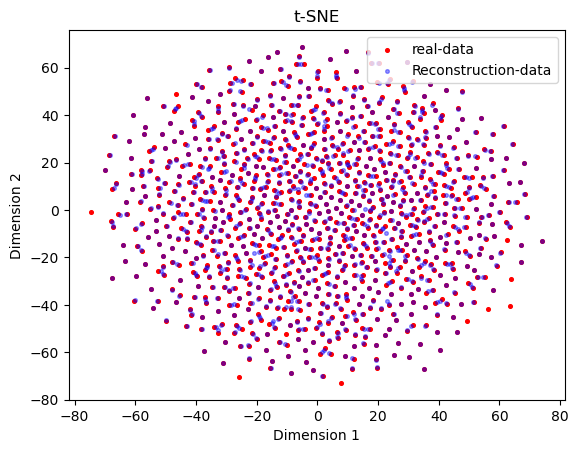

<Figure size 1000x1000 with 0 Axes>

In [106]:
import matplotlib.pyplot as plt

# t-SNE 결과 시각화
plt.scatter(r[:1000, 0], r[:1000, 1], s=7, color='red',  label='real-data')
plt.scatter(r[1000:, 0], r[1000:, 1], s=7,  alpha=0.4, color='blue', label='Reconstruction-data')

plt.title('t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


plt.legend(loc='upper right')
plt.figure(figsize=(10,10))
plt.show()


In [152]:
label_total_np[:1]
np.round(label_total_np[:1], 3)

array([[0.   , 0.529, 0.665, 0.472, 0.887, 1.   , 0.318, 0.988, 0.286,
        0.067, 0.   , 0.974, 0.714, 1.   , 0.022, 0.067, 0.654, 1.   ,
        0.947, 0.656, 0.622, 0.04 , 0.385, 0.2  , 1.   , 0.826, 0.17 ,
        0.444, 0.053, 0.458, 0.   , 1.   , 1.   , 0.9  , 1.   , 0.585,
        0.   , 0.   , 0.628, 0.312, 0.642, 0.539, 0.903, 0.763, 0.81 ,
        0.076, 0.579, 0.675, 0.696, 0.734, 0.04 , 0.768, 0.345, 0.317,
        0.83 , 0.284, 0.285, 0.794, 1.   , 0.175, 1.   , 0.249, 0.843,
        0.645, 0.   , 0.781, 0.   , 0.611, 0.   , 0.559, 0.444, 0.82 ,
        0.   , 1.   , 0.   , 1.   , 0.09 , 1.   , 0.155, 0.95 , 1.   ,
        0.42 , 0.   , 0.   , 0.508, 0.726, 0.25 , 0.267, 0.213, 0.263,
        1.   , 0.   , 0.   , 0.   , 0.122, 0.102, 0.73 , 0.924, 0.441,
        0.344, 0.437, 0.369, 0.791, 0.899, 0.928, 0.579, 0.342, 0.775,
        0.84 , 0.242, 1.   , 0.   , 0.403, 0.389, 0.882, 0.967, 0.31 ,
        0.407, 1.   , 0.844, 0.279, 0.262, 0.969, 1.   , 1.   , 0.   ,
      

In [153]:
np.round(recon_total_np[:1], 3)

array([[0.   , 0.364, 0.349, 0.583, 0.696, 1.   , 0.667, 0.574, 0.291,
        0.39 , 0.   , 0.448, 0.23 , 1.   , 0.344, 0.56 , 0.444, 1.   ,
        0.673, 0.658, 0.521, 0.369, 0.446, 0.435, 1.   , 0.572, 0.265,
        0.463, 0.525, 0.399, 0.002, 1.   , 1.   , 0.562, 1.   , 0.609,
        0.006, 0.   , 0.685, 0.274, 0.618, 0.661, 0.65 , 0.548, 0.459,
        0.489, 0.515, 0.69 , 0.32 , 0.638, 0.337, 0.609, 0.205, 0.453,
        0.35 , 0.403, 0.35 , 0.288, 0.995, 0.366, 1.   , 0.409, 0.699,
        0.649, 0.   , 0.515, 0.426, 0.692, 0.   , 0.475, 0.411, 0.658,
        0.   , 1.   , 0.   , 1.   , 0.506, 0.935, 0.342, 0.639, 1.   ,
        0.727, 0.04 , 0.   , 0.511, 0.578, 0.33 , 0.46 , 0.325, 0.404,
        1.   , 0.   , 0.004, 0.   , 0.58 , 0.41 , 0.451, 0.618, 0.548,
        0.614, 0.306, 0.358, 0.308, 0.553, 0.738, 0.623, 0.327, 0.614,
        0.61 , 0.188, 0.455, 0.005, 0.457, 0.572, 0.602, 0.474, 0.582,
        0.579, 0.977, 0.619, 0.391, 0.352, 0.438, 1.   , 1.   , 0.001,
      

### Optimization in latent space (TabNet)
- Prediction

In [154]:

import torch
import pandas as pd
import numpy as np

ex_scaled_new_Samples = torch.Tensor(scaled_new_Samples).to(device)

with torch.no_grad():
    encoded_vector_BO = model.encoder(ex_scaled_new_Samples)
    print("BO'S Encoded Latent Vector:", encoded_vector_BO)

BO'S Encoded Latent Vector: tensor([[0.4988, 0.5405, 0.4422,  ..., 0.3713, 0.3527, 0.5109],
        [0.7640, 0.6442, 0.1640,  ..., 0.6097, 0.3307, 0.3351],
        [0.2807, 0.6314, 0.3391,  ..., 0.3347, 0.3603, 0.7390],
        ...,
        [0.7683, 0.2947, 0.1242,  ..., 0.3432, 0.7535, 0.2623],
        [0.5056, 0.5941, 0.2355,  ..., 0.2918, 0.7536, 0.7689],
        [0.4166, 0.6395, 0.6219,  ..., 0.2108, 0.3471, 0.7188]],
       device='cuda:0')


In [155]:
### TabNet
### X = encoded_vector_BO (Scaling O) , Y = metrics (Scaling X)

from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_latent = np.array(encoded_vector_BO.cpu().numpy())
Y_latent = np.array(new_metrics_re)

lt_X_train, lt_X_test, lt_y_train, lt_y_test = train_test_split(X_latent,Y_latent,test_size=0.2, shuffle=True)


y_train_tps = lt_y_train[:,0][:, np.newaxis]
y_train_latecy = lt_y_train[:,1][:, np.newaxis]
y_test_tps = lt_y_test[:,0][:, np.newaxis]
y_test_latecy = lt_y_test[:,1][:, np.newaxis]


Y_scaler_tps  = MinMaxScaler().fit(y_train_tps)
Y_scaler_latecy = MinMaxScaler().fit(y_train_latecy)


scaled_lt_y_train_tps = Y_scaler_tps.transform(y_train_tps)
scaled_lt_y_train_latency = Y_scaler_latecy.transform(y_train_latecy)


scaled_lt_y_test_tps = Y_scaler_tps.transform(y_test_tps)
scaled_lt_y_test_latency = Y_scaler_latecy.transform(y_test_latecy)


scaled_lt_y_train = np.concatenate([scaled_lt_y_train_tps, scaled_lt_y_train_latency], axis = 1)
scaled_lt_y_test = np.concatenate([scaled_lt_y_test_tps, scaled_lt_y_test_latency], axis = 1)

# Tabnet 모델 생성
lt_regressor = TabNetRegressor(verbose = 10,seed = 42,optimizer_fn=torch.optim.AdamW) 
    
# 모델 학습
lt_regressor.fit(X_train=lt_X_train, y_train=scaled_lt_y_train,
              eval_set=[(lt_X_test, scaled_lt_y_test)],
              patience=500, 
              batch_size = 516,
              max_epochs=10000,
              eval_metric=['mse'])

# 테스트 데이터로 예측
lt_predictions = lt_regressor.predict(lt_X_test)

# 성능 평가
print('BEST VALID SCORE : ', lt_regressor.best_cost)
print('R2 SCORE : ' , r2_score(scaled_lt_y_test, lt_predictions))





epoch 0  | loss: 0.41798 | val_0_mse: 0.1131  |  0:00:00s
epoch 10 | loss: 0.04383 | val_0_mse: 0.04612 |  0:00:02s
epoch 20 | loss: 0.04085 | val_0_mse: 0.04602 |  0:00:04s
epoch 30 | loss: 0.03967 | val_0_mse: 0.04586 |  0:00:06s
epoch 40 | loss: 0.03654 | val_0_mse: 0.04636 |  0:00:09s
epoch 50 | loss: 0.03077 | val_0_mse: 0.03704 |  0:00:11s
epoch 60 | loss: 0.02094 | val_0_mse: 0.02849 |  0:00:13s
epoch 70 | loss: 0.01561 | val_0_mse: 0.01902 |  0:00:15s
epoch 80 | loss: 0.01054 | val_0_mse: 0.01296 |  0:00:17s
epoch 90 | loss: 0.0073  | val_0_mse: 0.00797 |  0:00:19s
epoch 100| loss: 0.00597 | val_0_mse: 0.00646 |  0:00:22s
epoch 110| loss: 0.00558 | val_0_mse: 0.00606 |  0:00:24s
epoch 120| loss: 0.00519 | val_0_mse: 0.00607 |  0:00:26s
epoch 130| loss: 0.00469 | val_0_mse: 0.0058  |  0:00:28s
epoch 140| loss: 0.00521 | val_0_mse: 0.00612 |  0:00:30s
epoch 150| loss: 0.00682 | val_0_mse: 0.00646 |  0:00:33s
epoch 160| loss: 0.00465 | val_0_mse: 0.00572 |  0:00:36s
epoch 170| los

In [156]:
print(r2_score(scaled_lt_y_test[:,0], lt_predictions[:,0]))
print(r2_score(scaled_lt_y_test[:,1], lt_predictions[:,1]))


0.9235525007587092
0.8727266588956126


In [157]:
saving_path_name = "/home/sein/mk_config/240403_mysql_models/tabnet_model_wkAA"
saved_filepath = lt_regressor.save_model(saving_path_name)


# regressor.load_model(saving_path_name)

Successfully saved model at /home/sein/mk_config/240403_mysql_models/tabnet_model_wkAA.zip


In [158]:
model_path = '/home/sein/mk_config/240403_mysql_models/autoencoder_wkAA.pt'
torch.save(model.state_dict(), model_path)
# fuck_model = Autoencoder().to('cuda')
# load_weight = torch.load(model_path)
# fuck_model.load_state_dict(load_weight)

# with torch.no_grad():
#     fuck_model.eval()
#     fuck_model.decoder(ex_data.to('cuda'))

In [ ]:
# from pytorch_tabnet.tab_model import TabNetRegressor
# from sklearn.model_selection import KFold
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import r2_score
# import numpy as np

# # K-Fold 설정
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# # 전체 데이터 준비
# X_latent = np.array(encoded_vector_BO.cpu().numpy())
# Y_latent = np.array(new_metrics_re)

# # MinMaxScaler 초기화
# Y_scaler_tps = MinMaxScaler()
# Y_scaler_latecy = MinMaxScaler()

# cv_accuracy = []

# # K-Fold 교차 검증 반복
# for train_idx, test_idx in kfold.split(X_latent):
#     # 훈련 데이터 및 테스트 데이터 분할
#     X_train, X_test = X_latent[train_idx], X_latent[test_idx]
#     y_train, y_test = Y_latent[train_idx], Y_latent[test_idx]

#     # 타겟 변수 스케일링
#     y_train_tps = y_train[:, 0][:, np.newaxis]
#     y_train_latecy = y_train[:, 1][:, np.newaxis]
#     y_test_tps = y_test[:, 0][:, np.newaxis]
#     y_test_latecy = y_test[:, 1][:, np.newaxis]

#     scaled_y_train_tps = Y_scaler_tps.fit_transform(y_train_tps)
#     scaled_y_train_latency = Y_scaler_latecy.fit_transform(y_train_latecy)

#     scaled_y_test_tps = Y_scaler_tps.transform(y_test_tps)
#     scaled_y_test_latency = Y_scaler_latecy.transform(y_test_latecy)

#     scaled_y_train = np.concatenate([scaled_y_train_tps, scaled_y_train_latency], axis=1)
#     scaled_y_test = np.concatenate([scaled_y_test_tps, scaled_y_test_latency], axis=1)

#     # Tabnet 모델 생성
#     lt_regressor = TabNetRegressor(verbose=20, seed=42, optimizer_fn=torch.optim.AdamW)

#     # 모델 학습
#     lt_regressor.fit(X_train=X_train, y_train=scaled_y_train,
#                      eval_set=[(X_test, scaled_y_test)],
#                      patience=500,
#                      batch_size=128,
#                      max_epochs=10000,
#                      eval_metric=['mse'])

#     # 테스트 데이터로 예측
#     lt_predictions = lt_regressor.predict(X_test)

#     cv_accuracy.append(r2_score(scaled_y_test, lt_predictions))
#     # 성능 평가
#     # print('BEST VALID SCORE: ', lt_regressor.best_cost)
#     # print('R2 SCORE: ', r2_score(scaled_y_test, lt_predictions))
    
# print('R2_SCORE MEAN: ', np.mean(cv_accuracy))


In [162]:
latent_pd = pd.DataFrame(encoded_vector_BO.cpu().numpy())
latent_pd_T = latent_pd.T
# latent_pd_T.index

In [219]:
### BO 코드
from sklearn.preprocessing import MinMaxScaler
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

class BO(object):
    def __init__(self, iteration, configs, metrics, regressor,config_info_path=None,):
        self.iteration = iteration
        self.configs = configs
        self.metrics = metrics
        self.config_info_path = config_info_path
        # self.min_max_same_knobs = []
        self.regressor = regressor
        self._get_config_info()
        self._init_pbounds()
    
    def _get_config_info(self):
        if self.config_info_path is None:
            self.config_info = pd.read_csv('/home/sein/mk_config/Knob_Information_MySQL_v5.7.csv', index_col=0)
        else:
            self.config_info = pd.read_csv(self.config_info_path, index_col=0)
        
        # if self.top_z_knob is not None:
        #     self.config_info = self.config_info.loc[self.top_z_knob]
        #     self.configs = self.configs[self.top_z_knob]
            

#     def _get_history(self):
#         self.history_configs = self.smac.runhistory.get_configs()
    
    def _init_pbounds(self):
        self.pbounds = {}
        
        for v in latent_pd_T.index:
            self.pbounds[str(v)] = (0, 1)
            
    
   
    
    def _target_function(self, **kwargs):
        x = np.fromiter(kwargs.values(), dtype=float)        
        # scaled_X = self.X_scaler.transform([x])
        x = x.reshape(1, -1)

        res = self.regressor.predict(x)
        res = res[:,0] / res[:,1]

        
        return res.squeeze()
        # return res
    
    
    def tune(self):
        self.optimizer = BayesianOptimization(f=self._target_function, pbounds=self.pbounds, verbose=2, random_state=2)

        self.acquisition_function = UtilityFunction(kind="ei", kappa=2.5, xi=0.001)
        
        self.optimizer.maximize(n_iter=self.iteration, init_points=100, acquisition_function=self.acquisition_function)
    

### Bayesian Optimization

In [220]:
# tuner1 = BO(iteration=500, 
#            configs=encoded_vector_BO.cpu().numpy(),
#            metrics=new_metrics_re
#            )
# tuner1.train_regression_model()
# tuner1.tune()
# # tuner1.plot_history()

tuner1 = BO(iteration=1000, 
           configs=encoded_vector_BO.cpu().numpy(),
           metrics=new_metrics_re,
           regressor=lt_regressor
           )
# tuner1.train_regression_model()
tuner1.tune()
# tuner1.plot_history()

|   iter    |  target   |     0     |     1     |    10     |    11     |    12     |    13     |    14     |    15     |    16     |    17     |    18     |    19     |     2     |    20     |    21     |    22     |    23     |    24     |    25     |    26     |    27     |    28     |    29     |     3     |    30     |    31     |     4     |     5     |     6     |     7     |     8     |     9     |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.02262   | 0.436     | 0.02593   | 0.5497    | 0.4353    | 0.4204    | 0.3303    | 0.2046    | 0.6193    | 0.2997    | 0.2668    | 0.6211    | 0.5291    | 0.1346    

In [50]:
ex_data =[0.2674, 0.3304, 0.6424, 0.09704, 0.8512, 0.8459, 0.4732, 0.4474, 0.8108,
          0.9238, 0.3662, 0.1817, 0.6052, 0.9395, 0.7801, 0.5615, 0.4154, 0.8053,
          0.9147, 0.009781, 0.09562, 0.006069, 0.5733, 0.5874, 0.9629, 0.8225,
          0.665, 0.8474, 0.6895, 0.9567, 0.2566, 0.1469]

In [186]:
#WKAA
ex_data = [0.6589    , 0.5027    , 0.1772    , 0.8412    , 0.598     , 0.2432    , 0.007372  , 0.4775    , 0.0       , 1.0       , 0.5331    , 1.0       , 0.293     , 0.3962    , 0.6545    , 1.0       , 0.01211   , 0.3802    , 0.0       , 0.9698    , 0.8618    , 0.4498    , 0.7405    , 0.6345    , 0.7021    , 0.9893    , 0.8988    , 0.2669    , 0.6585    , 1.0       , 0.2831    , 0.2523    ]

In [202]:
ex_data = [ 0.0       , 0.6461    , 0.9547    , 0.0       , 0.5861    , 0.08383   , 1.0       , 0.1367    , 1.0       , 0.0       , 0.9762    , 0.0       , 0.0       , 1.0       , 0.5297    , 0.0       , 1.0       , 1.0       , 0.1229    , 0.4816    , 0.0       , 0.0       , 1.0       , 1.0       , 1.0       , 0.3795    , 1.0       , 1.0       , 0.0       , 1.0       , 0.6391    , 0.2596    ]

In [211]:
ex_data = [0.0       , 0.7436    , 0.05715   , 1.0       , 0.5094    , 0.066     , 0.9522    , 0.952     , 0.0       , 0.8603    , 1.0       , 0.0       , 0.07395   , 0.0       , 1.0       , 0.04443   , 1.0       , 0.9048    , 0.0       , 1.0       , 1.0       , 0.0       , 1.0       , 1.0       , 0.02656   , 0.9539    , 1.0       , 0.0       , 1.0       , 1.0       , 0.2033    , 0.0443    ]

In [212]:
len(ex_data)

32

In [213]:
# Decoding to real dimension

ex_data = torch.tensor(ex_data).unsqueeze(0)
ex_data = ex_data.to('cuda:0')  # ex_data를 GPU로 이동

with torch.no_grad():
    model.eval()
    decode_value = model.decoder(ex_data)
    print("Decoded Value:", decode_value)

Decoded Value: tensor([[2.0891e-14, 6.7130e-01, 7.4296e-01, 5.0194e-01, 6.6559e-01, 9.9905e-01,
         7.2008e-02, 6.2578e-01, 3.5727e-01, 3.0801e-01, 6.0040e-02, 2.2530e-01,
         3.7639e-01, 1.0000e+00, 2.8043e-01, 3.8470e-01, 4.4163e-01, 2.0789e-10,
         5.6596e-01, 2.3756e-01, 5.9981e-01, 9.5004e-01, 3.9004e-01, 9.4888e-01,
         2.8299e-12, 6.5575e-01, 6.4148e-01, 7.1507e-01, 5.0081e-01, 3.9474e-01,
         1.0000e+00, 0.0000e+00, 1.0000e+00, 7.0269e-01, 1.0116e-03, 7.1050e-01,
         1.6365e-01, 7.4184e-21, 7.6683e-01, 2.7948e-01, 2.1039e-01, 2.5195e-01,
         9.6944e-01, 8.5093e-01, 8.1179e-01, 4.7483e-01, 5.2861e-01, 8.3834e-01,
         5.3147e-01, 1.2750e-01, 1.3742e-01, 2.0485e-01, 6.0335e-01, 2.3409e-02,
         5.5894e-01, 8.2474e-01, 1.5939e-01, 4.4029e-01, 1.5664e-27, 4.9261e-01,
         1.6409e-12, 8.9467e-01, 8.2601e-01, 6.8044e-01, 5.6902e-03, 3.7591e-01,
         4.8358e-01, 1.5434e-01, 6.7600e-07, 4.3908e-01, 8.5436e-02, 9.2761e-01,
         1.46

In [214]:
converted_values = [float(value) for value in decode_value[0]]


In [215]:
df_converted_values = pd.DataFrame(converted_values)

real_bo_config = df_converted_values[:138] 
real_v = np.array(real_bo_config)

rescaled_bo_config = scaler_conf.inverse_transform(real_v.reshape(1,-1))



In [216]:
real_bo_config

,0
0,0.000000000
1,0.671295166
2,0.742957473
3,0.501940370
4,0.665593088
...,...
133,0.950906157
134,0.164587051
135,0.355719745
136,0.109291732


In [217]:
pd.options.display.float_format = '{:.9f}'.format #지수함수 없이 출력하는 option

rescaled_actual_pd = pd.DataFrame(rescaled_bo_config)
rescaled_actual_pd

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,0.000000000,40278.038665771,7791526.596191406,501940.369606018,665675.351773620,0.999046504,758863.085144043,671927040.000000000,2.500871241,9.240204692,...,301779.797296524,383929.222822189,96507.413673401,2568.483010739,41.514467835,15579.646484375,176724855.462860107,47284.641418457,15237.171203613,0.000000856


In [218]:
for i in range (len(A_config.columns)):
    print('{} = {}'.format(A_config.columns[i], round(rescaled_actual_pd.iloc[0][i])))

automatic_sp_privileges  = 0
back_log  = 40278
binlog_cache_size  = 7791527
binlog_group_commit_sync_delay  = 501940
binlog_group_commit_sync_no_delay_count  = 665675
binlog_rows_query_log_events  = 1
binlog_stmt_cache_size  = 758863
bulk_insert_buffer_size  = 671927040
default_week_format  = 3
div_precision_increment  = 9
end_markers_in_json  = 0
eq_range_index_dive_limit  = 2253
expire_logs_days  = 3
explicit_defaults_for_timestamp  = 1
flush_time  = 50
ft_min_word_len  = 7
ft_query_expansion_limit  = 442
general_log  = 0
group_concat_max_len  = 2320
innodb_adaptive_hash_index_parts  = 122
innodb_adaptive_max_sleep_delay  = 599809
innodb_autoextend_increment  = 950
innodb_buffer_pool_size  = 7355756224
innodb_change_buffer_max_size  = 47
innodb_cmp_per_index_enabled  = 0
innodb_commit_concurrency  = 656
innodb_compression_failure_threshold_pct  = 64
innodb_compression_level  = 6
innodb_compression_pad_pct_max  = 38
innodb_concurrency_tickets  = 39474
innodb_deadlock_detect  = 1
innod

In [193]:
# 결과를 저장할 파일 경로 설정
file_path = '/home/sein/mk_config/240403_mysql_models/WKAA.txt'

# 파일 열기
with open(file_path, 'w') as file:
    # 각 열의 이름과 결과를 파일에 쓰기
    for i in range(len(A_config.columns)):
        file.write('{} = {}\n'.format(A_config.columns[i], round(rescaled_actual_pd.iloc[0][i])))

